# Problema da Árvore Geradora Mínima
## Algoritmo de Kruskall e Algoritmo de Prim
*Universidade Federal de Lavras  
Departamento de Ciência da Computação  
GCC218 - Algoritmos em Grafos  
Professor: Mayron Moreira*

*Material baseado em "Cormen, Thomas H and Leiserson, Charles E and Rivest, Ronald L and Stein, Clifford (2009). Introduction to algorithms, 3ed., MIT press"*

## Algoritmo de Kruskall

### Grafo de teste

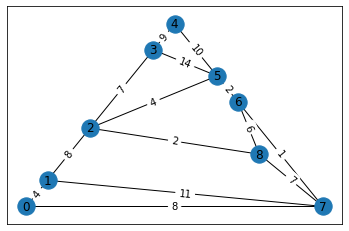

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
n = 9 # Número de vértices do grafo exemplo

# Adicionando os vértices em G
for i in range(n):
    G.add_node(i)

# Acrescentando suas arestas
G.add_edge(0, 1, weight=4)
G.add_edge(0, 7, weight=8)
G.add_edge(1, 2, weight=8)
G.add_edge(1, 7, weight=11)
G.add_edge(2, 3, weight=7)
G.add_edge(2, 5, weight=4)
G.add_edge(2, 8, weight=2)
G.add_edge(3, 4, weight=9)
G.add_edge(3, 5, weight=14)
G.add_edge(4, 5, weight=10)
G.add_edge(5, 6, weight=2)
G.add_edge(6, 7, weight=1)
G.add_edge(6, 8, weight=6)
G.add_edge(7, 8, weight=7)

pos = nx.planar_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

#### Inputs

In [16]:
# Pesos das arestas do grafo
w = nx.get_edge_attributes(G,'weight')

# Vertices do grafo
V = nx.nodes(G)

### Implementação

Adaptação da estrutura *disjoint-set-forest*, presente na Seção 21.3 de *Cormen, Thomas H and Leiserson, Charles E and Rivest, Ronald L and Stein, Clifford (2009). Introduction to algorithms, 3ed., MIT press.*, utilizando as estratégias *union-by-rank* e heurísticas *path-compression*.

Cada vértice possui os seguintes atributos:  
* $v$: identificador do vértice;
* $p$: identificador pai do vertice na "disjoint-set-forest";   
* $rank$: limite superior da altura do vértice, considerando o numero de arestas do maior caminho simples entre o  vertice em questao e um descendente folha.

In [17]:
'''
Recebe dois conjuntos (subarvores) e 
efetua a uniao entre as duas estruturas
'''
def uniao(x, y, conjuntos):
    ligar(x, y, conjuntos)
    
'''
Concatena as duas subarvores,
atualizando seus pais e seu rank
    conjuntos[v][0]: pai do vertice v
    conjuntos[v][1]: rank do vertice v
'''    
def ligar(x, y, conjuntos):
    # Se a subarvore x eh maior que a subarvore y, x passa a ser pai de y
    if(conjuntos[x][1] > conjuntos[y][1]):
        conjuntos[y][0] = x
    else: # Caso contrario, y passa a ser o pai de x
        conjuntos[x][0] = y
        if(conjuntos[x][1] == conjuntos[y][1]):
            conjuntos[y][1] = conjuntos[y][1] + 1
            
def encontra_conjunto(conjuntos, x):
    noh = x
    pai = conjuntos[noh][0]
    # Iterativamente, busca a raiz da subarvore (quando o id e o pai sao iguais)
    while(noh != pai):
        noh = pai
        pai = conjuntos[noh][0]
    conjuntos[x][0] = pai
    return pai

class Vertice:
    # Construtor default
    def __init__(self, identificador):
        self.__constroi_conjunto(identificador)
        
    '''
    Inicializacao do vertice com seu identificador,
    com o seu pai (que inicialmente eh um ponteiro
    para o proprio vertice) e seu rank (zero)
    '''
    def __constroi_conjunto(self, identificador):
        self.v = identificador
        self.p = identificador
        self.rank = 0

O Algoritmo de Kruskall ordenada (de forma ascendente) todas as arestas do grafo $G$ e insere-as, uma a uma, evitando a ocorrência de subciclos. Para evitar a inserção de arestas que causam subciclos, verificamos se o par de vértices $u$ e $v$ não pertencem à mesma componente conexa. O algoritmo se baseia no seguinte resultado teórico.

- *Seja $C=(V_C, E_C)$ uma componente conexa (árvore) na floresta $G_A = (V,A)$. Se $(u,v)$ é uma aresta leve que conecta $C$ a alguma outra componente em $G_A$, então $(u,v)$ é segura para $A$.*

In [18]:
'''
Output: Conjunto de arestas resultantes do Algoritmo de Kruskall.
Armazenaremos em forma de tripla: (u,v,w(u,v)), em que 
u e v são vértices, e w(u,v) é o peso de (u,v) no grafo
testado
'''
def Kruskall(V, w):
    T = [] # Inicializando o conjunto output: nossa AGM.
    
    # Numero de vertices
    n = len(V)
    
    conjuntos = {v: [v, 0] for v in V}

    '''
    Dicionario de arestas ordenadas por peso.
    Complexidade O(mlogm), em que m eh o numero de arestas
    '''
    w_ord = sorted(w.items(), key=lambda x: x[1])

    # Numero de arestas adicionadas
    n_arestas = 0
    
    '''
    Para cada aresta (ja ordenada, pelo peso).
    Complexidade: no pior caso, o loop executa
    O(m)
    '''
    for ((u,v), val) in w_ord:
        conju = encontra_conjunto(conjuntos, u)
        conjv = encontra_conjunto(conjuntos, v)
        if(conju != conjv):
            T.append((u, v, w[(u,v)]))
            n_arestas = n_arestas + 1
            
            # So funciona se o grafo for conexo!
            if(n_arestas == n-1):
                break
            uniao(conju, conjv, conjuntos)
            
    return T

AGM = Kruskall(V, w)

#### Impressão da AGM

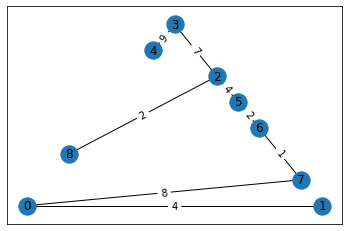

In [19]:
tree = nx.Graph()

# Adicionando os vértices em G
for i in range(n):
    tree.add_node(i)

# Acrescentando suas arestas
for e in AGM:
    tree.add_edge(e[0], e[1], weight=e[2])

pos = nx.planar_layout(tree) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(tree,pos)
labels = nx.get_edge_attributes(tree,'weight')
nx.draw_networkx_edge_labels(tree,pos,edge_labels=labels)
plt.show()

Cormen et al. (2009) indica, na Seção 23.2, que o Algoritmo de Kruskall pode chegar à complexidade de $O(mlog\,n)$.

## Algoritmo de Prim

#### Inputs (adicional)

In [20]:
# Raiz (vertice inicial do algoritmo). Você pode começar por qualquer vértice.
r = 0

# Vertices do grafo
E = nx.edges(G)

#### Estruturas adicionais

In [21]:
INFINITO = 1000000

# Chave de cada vértice
chave = [INFINITO for v in V]

# Pai de cada vertice do grafo
pai = [-1 for v in V]

# visitado[v] eh true se o vertice v ja esta na AGM
adicionado_agm = [False for v in V]

# Lista de adjacencia do grafo
lista_adj = [[] for v in range(n)]
for e in E:
    lista_adj[e[0]].append(e[1])
    lista_adj[e[1]].append(e[0])

# Acrescentando o par nao-ordenado (v,u) em w
for e in E:
    w[(e[1], e[0])] = w[(e[0], e[1])]

### Implementação

Ao contrário do Algoritmo de Kruskall, o Algoritmo de Prim expande a subárvore parcial a partir de arestas leves. Assim, a solução parcial se mantém, a todo momento, conexa. O algoritmo se baseia no seguinte resultado teórico.

- *Seja $G=(V,E)$ um grafo valorado não orientado. Considere $A$ um subconjunto de $E$ que está incluído em alguma AGM para $G$, $(S,V-S)$ qualquer corte de $G$ que respeita $A$ e $(u,v) \in E$ uma aresta leve que cruza $(S,V-S)$. Então, a aresta $(u,v)$ é segura para $A$.*

In [22]:
def obtemMin(chave, adicionado_agm, n):
    minimo = INFINITO
    u = 0 # Vertice nao visitado com o menor valor de chave
    for v in range(n):
        if(minimo > chave[v] and (not adicionado_agm[v])):
            minimo = chave[v]
            u = v
            
    return u

'''
Output: Conjunto de arestas resultantes do Algoritmo de Kruskall.
Armazenaremos em forma de tripla: (u,v,w(u,v)), em que 
u e v são vértices, e w(u,v) é o peso de (u,v) no grafo
testado
'''
def Prim(V, r, w):
    T = [] # Inicializando o conjunto output: nossa AGM.
    
    chave[r] = 0
    pai[r] = r
    
    vtx_nao_explorados = n
    while(vtx_nao_explorados != 0):
        u = obtemMin(chave, adicionado_agm, n) # Complexidade de O(n). Pode ser melhorado com uma heap-min
        vtx_nao_explorados = vtx_nao_explorados - 1
        adicionado_agm[u] = True
        for v in lista_adj[u]:
            if(not adicionado_agm[v] and w[(u,v)] < chave[v]):
                    pai[v] = u
                    chave[v] = w[(u,v)]         
    for v in V:
        if(pai[v] != v):
            T.append((pai[v], v, w[(pai[v],v)]))
    return T

AGM = Prim(V, r, w)

#### Impressão da AGM

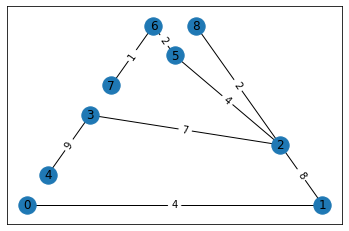

In [23]:
tree = nx.Graph()

# Adicionando os vértices em G
for i in range(n):
    tree.add_node(i)

# Acrescentando suas arestas
for e in AGM:
    tree.add_edge(e[0], e[1], weight=e[2])

pos = nx.planar_layout(tree) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(tree,pos)
labels = nx.get_edge_attributes(tree,'weight')
nx.draw_networkx_edge_labels(tree,pos,edge_labels=labels)
plt.show()

Cormen et al. (2009) indica, ao fim da Seção 23.2, que o Algoritmo de Prim pode chegar à complexidade de $O((m+n)log\,n)$, caso haja o gerenciamento dos vértices a serem incluídos na AGM seja feito através de uma *heap* binária. Em nossa implementação, temos uma complexidade resultante de $O(n^2)$.

## Referências

* Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms. Chapter 23. MIT press.